## Data Overview

In [50]:
!pip install skimpy rapidfuzz

In [51]:
import os
print(os.listdir('/kaggle/input'))


['population', 'life-expectancy-who']


In [52]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np 
import pandas as pd 
from skimpy import skim
import missingno as msno
import seaborn as sns
import shap

import lightgbm as lgb
from rapidfuzz import process
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE

In [53]:
data = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")

In [54]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [55]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [56]:
data.describe(include='object')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [57]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year        │   0 │     0 │     2008 │    4.614 │  2000 │   2004 │    2008 │    2012 │       2015 │ ▇▅▇▅▇▇ │  │
│ │ Life        │  10 │  0.34 │    69.22 │    9.524 │  36.3 │   63.1 │    72.1 │    75.7 │         89 │  ▁▃▅▇▂ │  │
│ │ expectancy  │     │       │          │          │       │        │         │         │            │        │  │
│ │ Adult       │  10 │  0.34 │    164.8 │    124.3 │     1 │     74 │     144 │     228 │        723 │  ▇▇▃▁  │  │
│ │ Mortality   │     │       │          │          │       │        │         │         │            │        │  │
│ │ infant      │   0 │     0 │     30.3 │    117.9 │     0 │      0 │       3 │      22 │       1800 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Alcohol     │ 194 │   6.6 │    4.603 │    4.052 │  0.01 │ 0.8775 │   3.755 │   7.703 │      17.87 │ ▇▃▃▂▁  │  │
│ │ percentage  │   0 │     0 │    738.3 │     1988 │     0 │  4.685 │   64.91 │   441.5 │      19480 │   ▇    │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Hepatitis B │ 553 │ 18.82 │    80.94 │    25.07 │     1 │     77 │      92 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Measles     │   0 │     0 │     2420 │    11470 │     0 │      0 │      17 │   360.2 │     212200 │   ▇    │  │
│ │  BMI        │  34 │  1.16 │    38.32 │    20.04 │     1 │   19.3 │    43.5 │    56.2 │       87.3 │ ▃▆▃▇▃  │  │
│ │ under-five  │   0 │     0 │    42.04 │    160.4 │     0 │      0 │       4 │      28 │       2500 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Polio       │  19 │  0.65 │    82.55 │    23.43 │     3 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Total       │ 226 │  7.69 │    5.938 │    2.498 │  0.37 │   4.26 │   5.755 │   7.492 │       17.6 │  ▂▇▆▂  │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Diphtheria  │  19 │  0.65 │    82.32 │    23.72 │     2 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │  HIV/AIDS   │   0 │     0 │    1.742 │    5.078 │   0.1 │    0.1 │     0.1 │     0.8 │       50.6 │   ▇    │  │
│ │ GDP         │ 448 │ 15.25 │     7483 │    14270 │ 1.681 │  463.9 │    1767 │    5911 │     119200 │   ▇▁   │  │
│ │ Population  │ 652 │ 22.19 │ 12750000 │ 61010000 │   

In [58]:
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [59]:
print(data.Year.unique())

[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000]


In [60]:
print(data.keys())

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [61]:
data.rename(columns = lambda x: x.strip(), inplace=True)

In [62]:
print(data.keys())

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [63]:
print(data.Status.unique())

['Developing' 'Developed']


## Create a basic Linear regression model with mean filled NaN prior to any data cleaning

In [64]:
# from sklearn.linear_model import LinearRegression

# unfiltered = data.fillna(value=mean_value, inplace=True) 
# reg_1 = LinearRegression.fit()

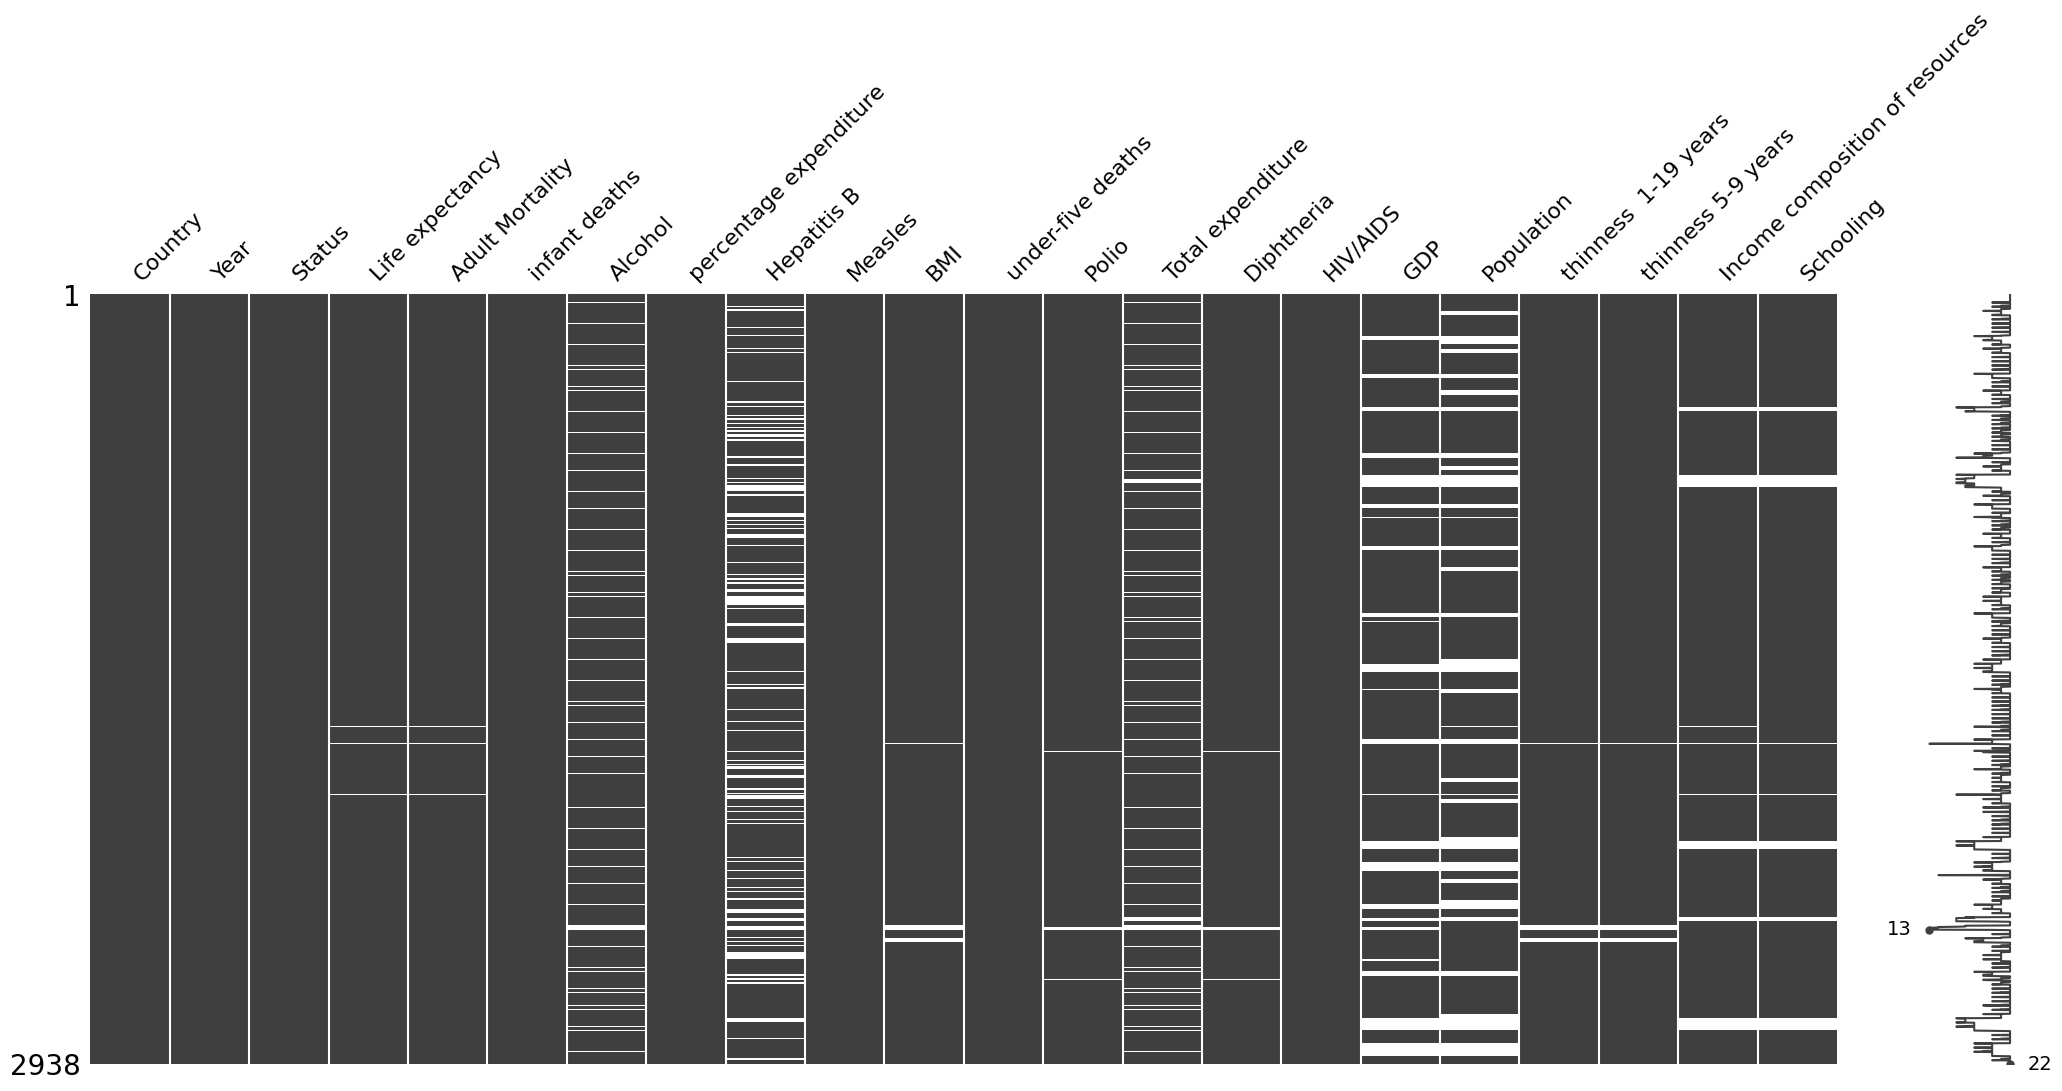

In [65]:
msno.matrix(data)
plt.show()

In [66]:
data

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [67]:
def remove_error_values(column, data):
    pivot = data.pivot(index='Year', columns='Country', values=column)
    pivot.interpolate(method='linear', inplace=True)
    pivot.bfill(inplace=True)
    pivot.ffill(inplace=True)
    # print(pivot)

    cols_to_interp = pivot.columns[(pivot.mean() > 0.03)]
    pivot = pivot[cols_to_interp].replace(0.01, np.nan)
    pivot.interpolate(method='linear', inplce=True)

    unpivot = pivot.reset_index().melt(id_vars='Year', 
                                                var_name='Country', 
                                                value_name=column)
    
    updated_data = pd.merge(data,unpivot,
                        how='left',
                        on = ['Year', 'Country'],
                        suffixes=("",'_updated' ))
    update_column = column + '_updated'
    updated_data[column] = updated_data[update_column].combine_first(updated_data[column])
    updated_data.drop(columns=[update_column])

    return data

In [68]:
columns = ['Alcohol', 'HIV/AIDS']
for column in columns:
    data = remove_error_values(column, data)

In [69]:
data

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [70]:
print('NaNs in Alcohol')
for year in data['Year'].unique():
    print(f'Year: {year}, NaNs: ',data[data['Year']==year]['Alcohol'].isnull().sum())

filtered = data[(data['Alcohol'].isnull()) & (data['Year'] != 2015)]
# print(filtered)
# print(filtered['Country'].unique())
# print(data[(data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya']))])


NaNs in Alcohol
Year: 2015, NaNs:  177
Year: 2014, NaNs:  1
Year: 2013, NaNs:  2
Year: 2012, NaNs:  1
Year: 2011, NaNs:  1
Year: 2010, NaNs:  1
Year: 2009, NaNs:  1
Year: 2008, NaNs:  1
Year: 2007, NaNs:  1
Year: 2006, NaNs:  1
Year: 2005, NaNs:  2
Year: 2004, NaNs:  1
Year: 2003, NaNs:  1
Year: 2002, NaNs:  1
Year: 2001, NaNs:  1
Year: 2000, NaNs:  1


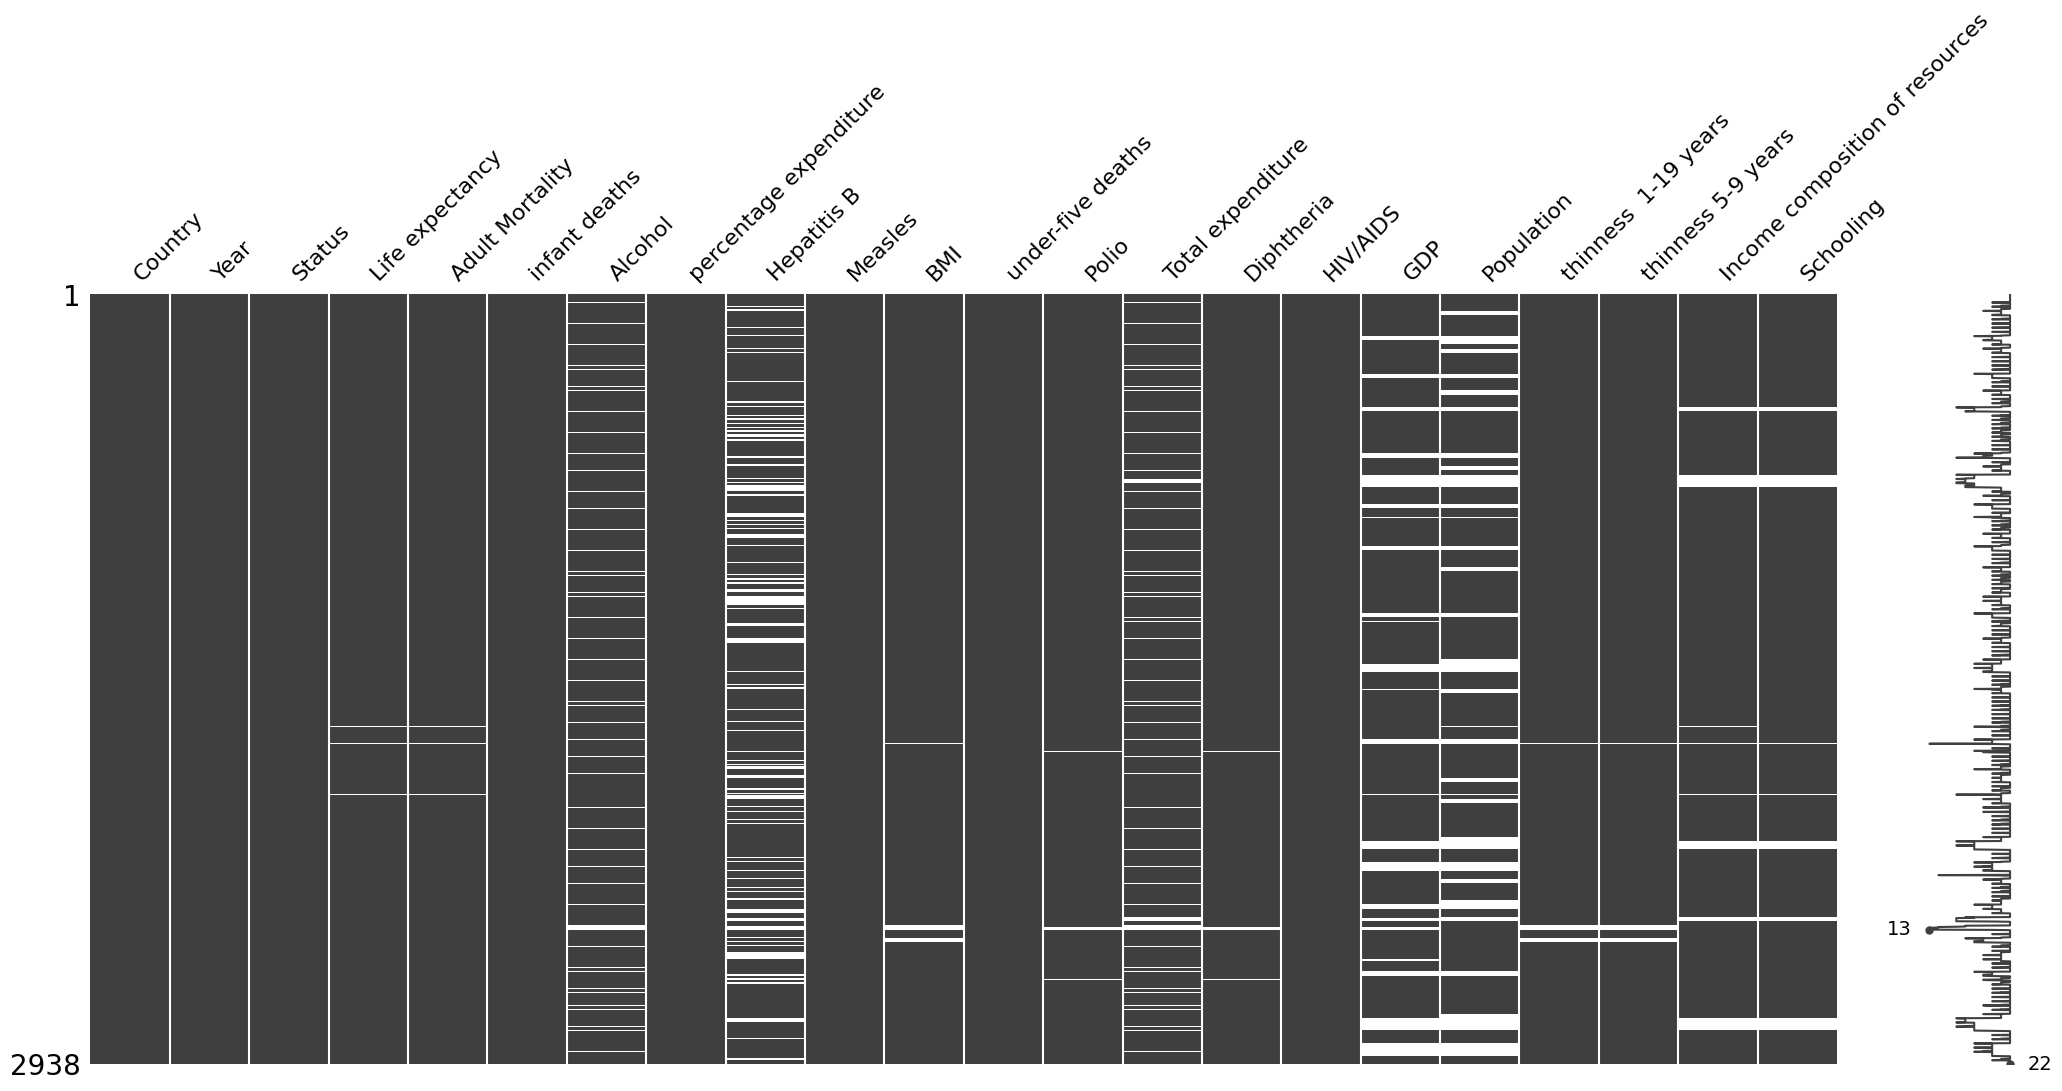

In [71]:
msno.matrix(data)
plt.show()

## Alcohol NaN Hnadling

In [72]:
print('NaNs in Alcohol')
for year in data['Year'].unique():
    print(f'Year: {year}, NaNs: ',data[data['Year']==year]['Alcohol'].isnull().sum())

filtered = data[(data['Alcohol'].isnull()) & (data['Year'] != 2015)]
# print(filtered)
# print(filtered['Country'].unique())
# print(data[(data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya']))])

NaNs in Alcohol
Year: 2015, NaNs:  177
Year: 2014, NaNs:  1
Year: 2013, NaNs:  2
Year: 2012, NaNs:  1
Year: 2011, NaNs:  1
Year: 2010, NaNs:  1
Year: 2009, NaNs:  1
Year: 2008, NaNs:  1
Year: 2007, NaNs:  1
Year: 2006, NaNs:  1
Year: 2005, NaNs:  2
Year: 2004, NaNs:  1
Year: 2003, NaNs:  1
Year: 2002, NaNs:  1
Year: 2001, NaNs:  1
Year: 2000, NaNs:  1


In [73]:
# alcohol = data[data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya', 'Bangladesh', 'Vanuatu', 'Montenegro'])]

alcohol = data.pivot(index='Year', columns='Country', values='Alcohol')
alcohol.interpolate(method='linear', inplace=True)
print(alcohol.isnull().sum()[alcohol.isnull().sum()>1])
alcohol.bfill(inplace=True)
alcohol.ffill(inplace=True)
# print(alcohol.isnull().sum()[alcohol.isnull().sum()>1])
# print(alcohol)

Country
Cook Islands             13
Dominica                 13
Marshall Islands         13
Monaco                   13
Nauru                    13
Niue                     13
Palau                    16
Saint Kitts and Nevis    13
San Marino               13
South Sudan              16
Tuvalu                   13
dtype: int64


In [74]:
def remove_error_values(column, data):
    pivot = data.pivot(index='Year', columns='Country', values=column)
    pivot.interpolate(method='linear', inplace=True)
    pivot.bfill(inplace=True)
    pivot.ffill(inplace=True)

    cols_to_interp = pivot.columns[pivot.mean() > 0.03]
    pivot = pivot[cols_to_interp].replace(0.01, np.nan)
    pivot.interpolate(method='linear', inplce=True, axis=0)

    unpivot = alcohol.reset_index().melt(id_vars='Year', 
                                                var_name='Country', 
                                                value_name=column)
    
    updated_data = pd.merge(data,unpivot,
                        how='left',
                        on = ['Year', 'Country'],
                        suffixes=("",'_updated' ))
    update_column = column + '_updated'
    updated_data[column] = updated_data[update_column].combine_first(updated_data[column])
    updated_data.drop(columns=[update_column])

    return data

In [75]:
cols_to_interp = alcohol.columns[alcohol.mean() > 0.03]
alcohol = alcohol[cols_to_interp].replace(0.01, np.nan)
alcohol.interpolate(method='linear', inplace=True, axis=0)
alcohol

Country  Albania  Algeria  Angola  Antigua and Barbuda  Argentina  Armenia  \
Year                                                                         
2000        3.66     0.25    1.85                 7.27       7.68     2.90   
2001        4.25     0.23    2.58                 7.51       7.76     2.86   
2002        3.73     0.36    2.82                 7.21       7.81     2.86   
2003        4.29     0.34    3.49                 7.16       7.62     3.03   
2004        4.54     0.45    3.53                 7.28       7.63     3.81   
2005        5.16     0.50    5.04                 8.15       7.53     4.25   
2006        5.31     0.36    5.84                 8.93       7.75     4.01   
2007        5.58     0.44    6.35                 8.64       8.16     3.99   
2008        5.61     0.46    7.07                 8.27       8.41     3.96   
2009        5.79     0.50    7.01                 7.82       8.33     3.96   
2010        5.28     0.45    7.80                 7.84       8.15     4.23   
2011        5.37     0.56    8.06                 7.84       8.11     4.09   
2012        5.14     0.66    8.24                 8.18       8.35     3.89   
2013        4.76     0.53    8.10                 8.58       8.28     3.79   
2014        4.51     0.53    8.33                 8.56       7.93     3.91   
2015        4.60     0.53    8.33                 8.56       7.93     3.91   

Country  Australia  Austria  Azerbaijan  Bahamas  ...  \
Year                                              ...   
2000         10.17    13.20        0.65    12.15  ...   
2001          9.53    12.40        0.51    11.64  ...   
2002          9.84    12.50        0.55    10.85  ...   
2003          9.97    12.20        0.55    10.68  ...   
2004          9.84    12.10        0.62    10.10  ...   
2005         10.30    12.40        0.73    10.49  ...   
2006         10.31    12.40        0.85    11.07  ...   
2007         10.56    12.50        1.02    10.75  ...   
2008         10.76    12.00        1.18    10.15  ...   
2009         10.62    11.30        2.10     9.29  ...   
2010         10.52    12.10        1.98     9.19  ...   
2011         10.30    12.04        1.98     9.34  ...   
2012         10.03    12.26        2.06     9.50  ...   
2013          9.87    11.82        2.14     9.42  ...   
2014          9.71    12.32        2.14     9.45  ...   
2015          9.71    12.32        2.14     9.45  ...   

Country  United Republic of Tanzania  United States of America  Uruguay  \
Year                                                                      
2000                            3.89                      8.21     6.65   
2001                            4.09                      8.25     6.48   
2002                            3.37                      8.33     5.86   
2003                            2.34                      8.40     5.11   
2004                            3.81                      8.48     5.66   
2005                            3.94                      8.52     6.35   
2006                            4.07                      8.63     6.58   
2007                            4.40                      8.74     6.67   
2008                            3.44                      8.74     6.76   
2009                            3.97                      8.71     6.67   
2010                            4.19                      8.55     6.21   
2011                            4.04                      8.67     5.97   
2012                            3.98                      8.82     5.77   
2013                            4.20                      8.82     5.82   
2014                            4.20                      8.82     6.03   
2015                            4.20                      8.82     6.03   

Country  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  \
Year                                                                         
2000           1.60     1.21                                8

In [76]:
print(alcohol.isnull().sum()[alcohol.isnull().sum()>0])

Country
Estonia       2
Montenegro    5
dtype: int64


In [77]:
alcohol[['Estonia','Montenegro', 'Saint Kitts and Nevis']]
alcohol.bfill(inplace=True)
print(alcohol.isnull().sum()[alcohol.isnull().sum()>0])

Series([], dtype: int64)


In [78]:
unpivot = alcohol.reset_index().melt(id_vars='Year', 
                                                var_name='Country', 
                                                value_name='Alcohol')
unpivot

Year   Country  Alcohol
0     2000   Albania     3.66
1     2001   Albania     4.25
2     2002   Albania     3.73
3     2003   Albania     4.29
4     2004   Albania     4.54
...    ...       ...      ...
2795  2011  Zimbabwe     6.00
2796  2012  Zimbabwe     6.09
2797  2013  Zimbabwe     6.39
2798  2014  Zimbabwe     6.50
2799  2015  Zimbabwe     6.50

[2800 rows x 3 columns]

In [79]:
data[['Year','Country','Alcohol']]

updated_data = pd.merge(data,unpivot,
                        how='left',
                        on = ['Year', 'Country'],
                        suffixes=("",'_updated' ))
updated_data['Alcohol'] = updated_data['Alcohol_updated'].combine_first(updated_data['Alcohol'])
updated_data.drop(columns=['Alcohol_updated'])

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...    6.0               8.16        65.0       0.1  584.259210   
1     ...   58.0               8.18        62.0       0.1  612.696514   
2     ...   62.0               8.13        64.0       0.1  631.744976   
3     ...   67.0               8.52        67.0       0.1  669.959000   
4     ...   68.0               7.87        68.0       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
2933  ...   67.0               7.13        65.0      33.6  454.366654   
2934  ...    7.0               6.52        68.0      36.7  453.351155   
2935  ...   73.0               6.53        71.0      39.8   57.348340   
2936  ...   76.0               6.16        75.0      42.1  548.587312   
2937  ...   78.0               7.10        78.0      43.5  547.358878   

      Population  thinness  1-19 years  thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
2933  12777511.0                   9.4                 9.4   
2934  12633897.0                   9.8                 9.9   
2935    125525.0                   1.2                 1.3   
2936  12366165.0                   1.6                 1.7   
2937  12222251.0                  11.0                11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937         

In [80]:
print('NaNs in Alcohol')
for year in data['Year'].unique():
    print(f'Year: {year}, NaNs: ',data[data['Year']==year]['Alcohol'].isnull().sum())

filtered = data[(data['Alcohol'].isnull()) & (data['Year'] != 2015)]
# print(filtered)
# print(filtered['Country'].unique())
# print(data[(data['Country'].isin(['South Sudan', 'Ethiopia', 'Sudan', 'Uganda', 'Kenya']))])

NaNs in Alcohol
Year: 2015, NaNs:  177
Year: 2014, NaNs:  1
Year: 2013, NaNs:  2
Year: 2012, NaNs:  1
Year: 2011, NaNs:  1
Year: 2010, NaNs:  1
Year: 2009, NaNs:  1
Year: 2008, NaNs:  1
Year: 2007, NaNs:  1
Year: 2006, NaNs:  1
Year: 2005, NaNs:  2
Year: 2004, NaNs:  1
Year: 2003, NaNs:  1
Year: 2002, NaNs:  1
Year: 2001, NaNs:  1
Year: 2000, NaNs:  1


### It appears as well as NaNs some values are defined as 0.01 when there is no data.
This can be solved by either taking the mean or by using a linear regression based on other data and comparing it to other countries. (Would need to account for whether a nation is primarily Muslim in this calculation)

In [81]:
data = updated_data

In [82]:
print(data['Alcohol'].isnull().sum()[data['Alcohol'].isnull().sum()>0])

[24]


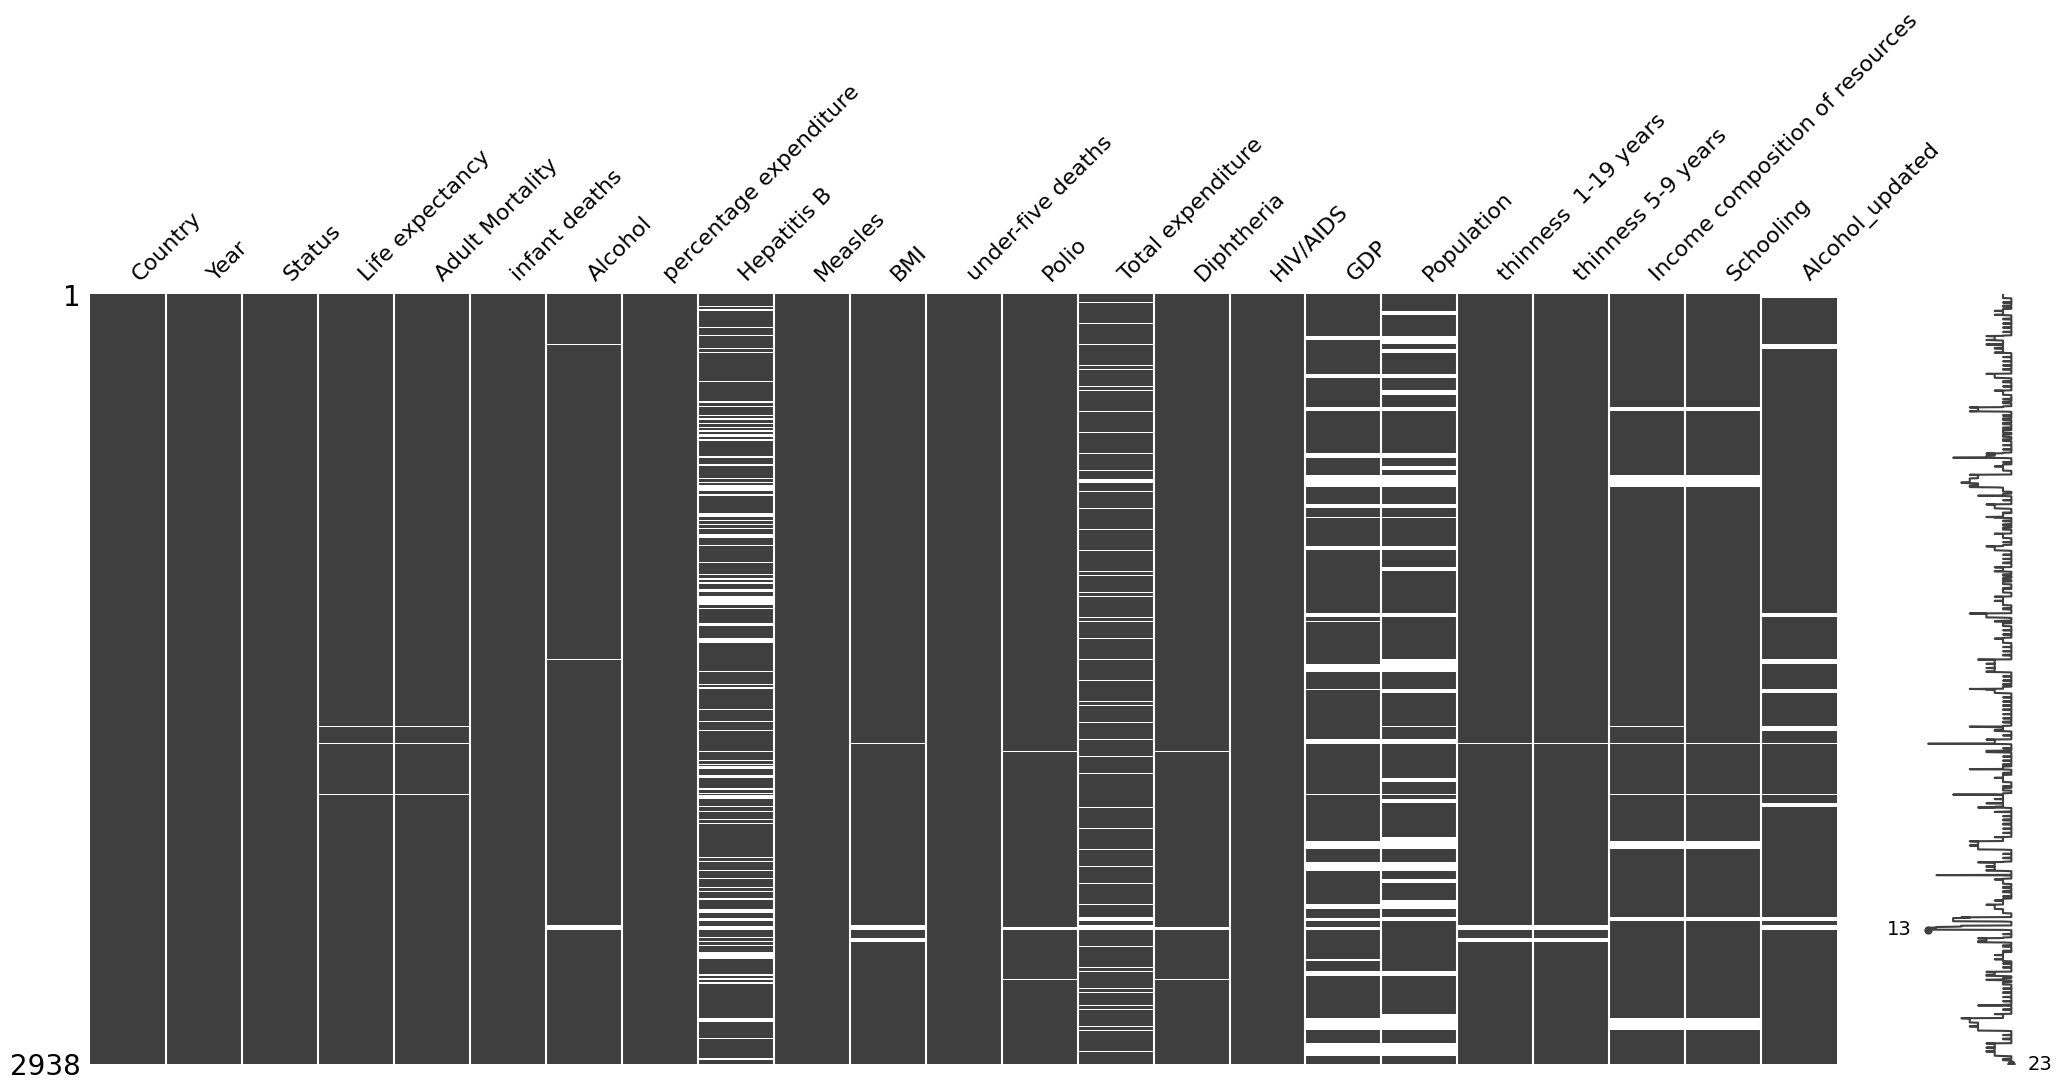

In [83]:
msno.matrix(data)
plt.show()

In [84]:
new_life_expectancy = data.loc[data['Year'] ==2015, ['Country','Life expectancy', 'Status']][::3].sort_values('Life expectancy',ascending=False)
new_life_expectancy

Country  Life expectancy      Status
673          Cyprus             85.0   Developed
2313      Singapore             83.1   Developed
2505         Sweden             82.4   Developed
1538     Luxembourg             82.0   Developed
1829    Netherlands             81.9   Developed
...             ...              ...         ...
2409    South Sudan             57.3  Developing
480        Cameroon             57.3  Developing
432   Côte d'Ivoire             53.3  Developing
528            Chad             53.1  Developing
48           Angola             52.4  Developing

[61 rows x 3 columns]

In [85]:
# def barchart(metrics):
#     plt.subplots(figsize=(14,9))
#     for metric in metrics:
#         sub_data = data.loc[data['Year'] ==2012, ['Country',metric, 'Status']][::3].sort_values(metric,ascending=False)
#         color_map = {'Developed': 'green', 'Developing': 'orange'}
#         colors = [color_map[status] for status in sub_data['Status']]

        
#         plt.bar(sub_data['Country'], sub_data[metric], color = colors)
#         plt.xticks(rotation=45, ha='right')
#         plt.xlabel('Countries')
#         plt.ylabel(f'{metric}')
#         legend_elements = [Patch(facecolor='green', label='Developed'),
#                         Patch(facecolor='orange', label='Developing')]
#         plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
#         plt.title(f'{metric} in 2012')
#     plt.show()



def barchart(metrics, data):
    # Determine the number of rows needed based on metrics
    n_cols = 2
    n_rows = (len(metrics) + n_cols - 1) // n_cols  # Calculate rows needed for 4 columns per row

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))  # Adjust figure size for layout
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    color_map = {'Developed': 'green', 'Developing': 'orange'}

    for i, metric in enumerate(metrics):
        # Prepare the data for the specific metric
        sub_data = data.loc[data['Year'] == 2012, ['Country', metric, 'Status']][::6].sort_values(metric, ascending=False)
        colors = [color_map[status] for status in sub_data['Status']]

        ax = axes[i]  # Select the appropriate subplot
        ax.bar(sub_data['Country'], sub_data[metric], color=colors)
        ax.set_xticks(range(len(sub_data['Country'])))
        ax.set_xticklabels(sub_data['Country'], rotation=45, ha='right')
        ax.set_xlabel('Countries')
        ax.set_ylabel(f'{metric}')
        ax.set_title(f'{metric} in 2012')

        # Add legend to the last subplot of each row
        if i == len(metrics) - 1 or (i + 1) % n_cols == 0:
            legend_elements = [Patch(facecolor='green', label='Developed'),
                               Patch(facecolor='orange', label='Developing')]
            ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    # Hide any unused subplots
    for j in range(len(metrics), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


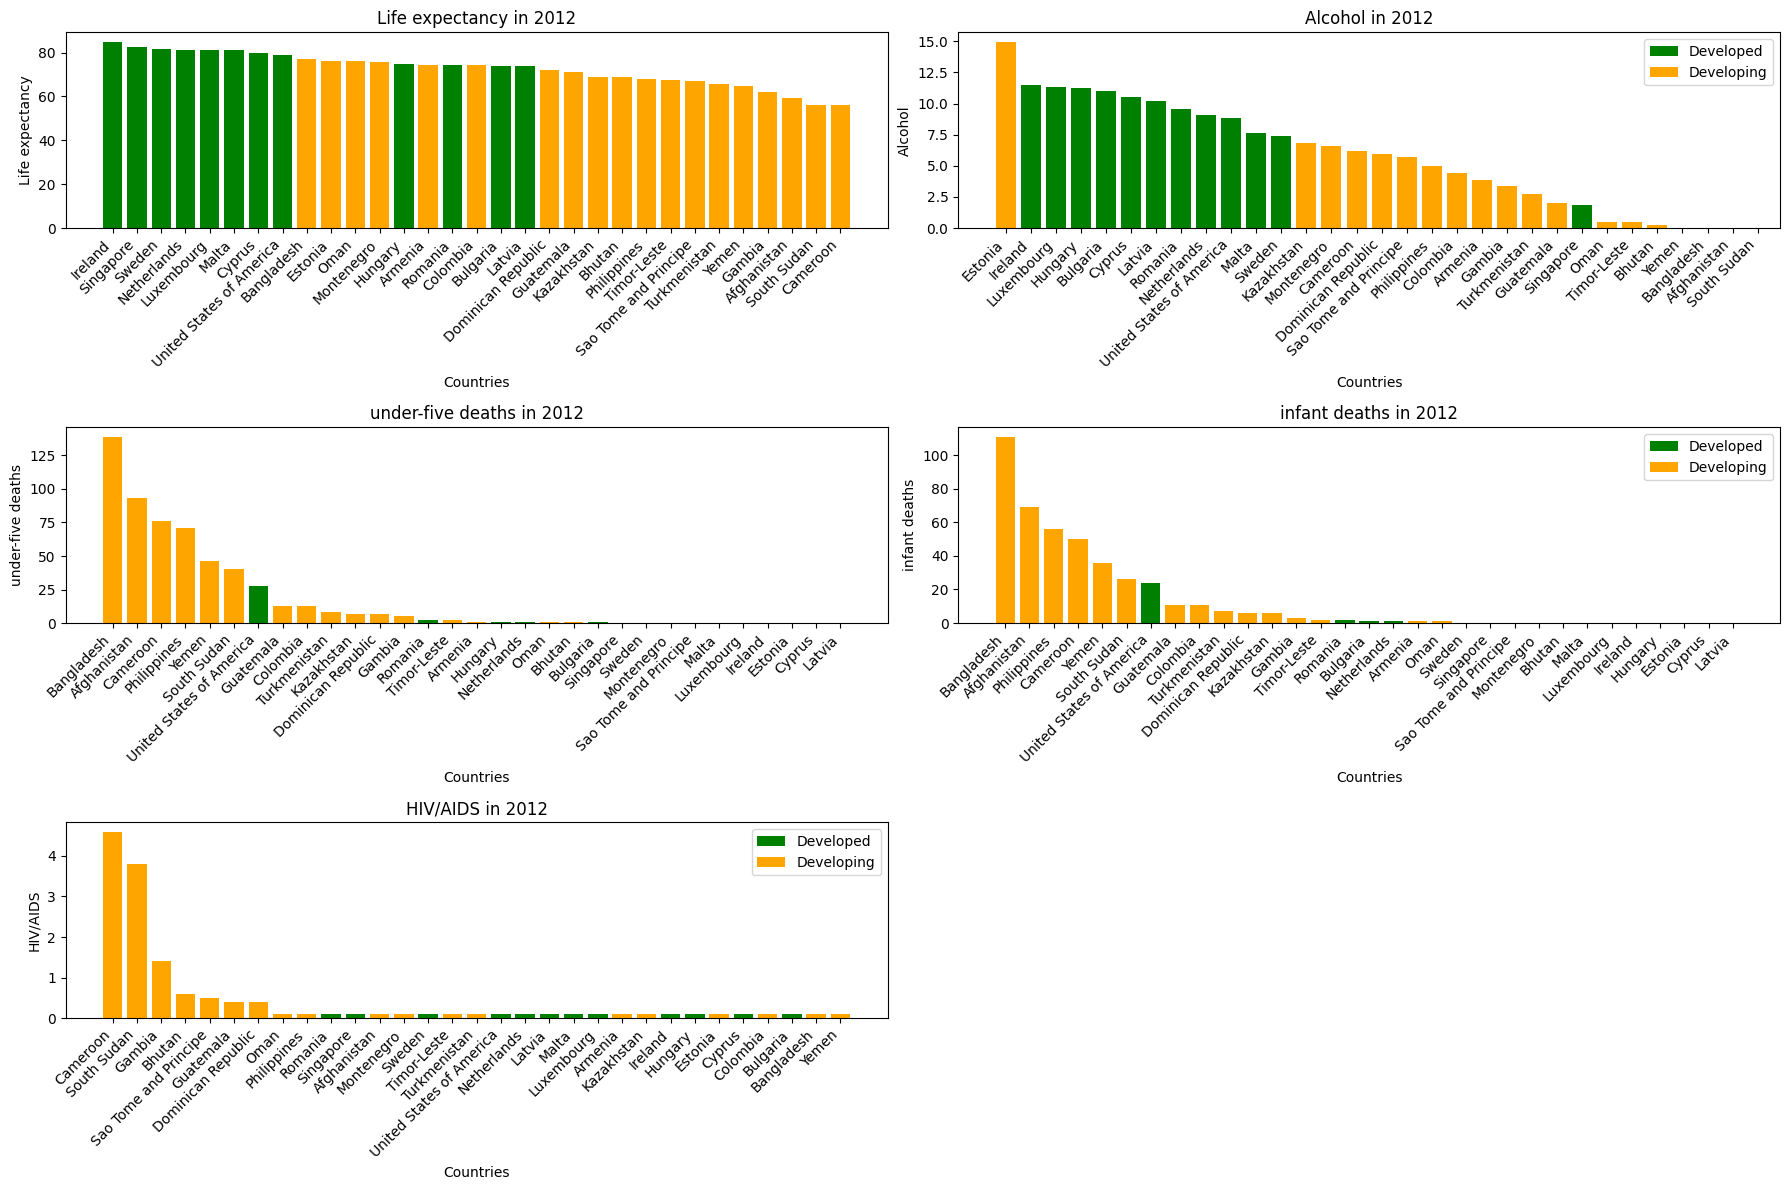

In [86]:
values = ['Life expectancy', 'Alcohol', 'under-five deaths', 'infant deaths', 'HIV/AIDS']
barchart(values, data)

## Fix GDP and Population data using external sources


In [87]:
gdp = data.pivot(index='Year', columns='Country', values='GDP')
gdp

Country  Afghanistan      Albania      Algeria       Angola  \
Year                                                          
2000      114.560000  1175.788981  1757.177970   555.296942   
2001      117.496980  1326.973390  1732.857979   526.168743   
2002      187.845950  1453.642777  1774.336730   711.181716   
2003      198.728544   189.681557   294.335560   779.468356   
2004      219.141353  2416.588235  2598.982300   141.868440   
2005       25.294130   279.142931    31.122378  1443.991929   
2006      272.563770    35.129300  3464.617900   262.415149   
2007      369.835796   363.136850  3935.183343  2878.837144   
2008      373.361116   437.539647   495.254866  3868.578883   
2009      445.893298  4114.136545  3868.831230  3347.844850   
2010      553.328940   494.358832  4463.394675  3529.534820   
2011       63.537231  4437.178680  5432.252300  4299.128890   
2012      669.959000  4247.614380  5564.825660  4598.249988   
2013      631.744976  4414.723140  5471.866766   484.616884   
2014      612.696514  4575.763787   547.851700   479.312240   
2015      584.259210  3954.227830  4132.762920  3695.793748   

Country  Antigua and Barbuda     Argentina      Armenia    Australia  \
Year                                                                   
2000             9875.161736   7669.273916   622.742748   2169.92100   
2001             9358.154162    717.694674   694.435119  19517.84168   
2002             9386.716452   2579.193168   783.261699    281.81763   
2003             9739.825560    333.437600    93.166157  23465.38559   
2004             1352.837400   4251.574348  1191.961920   3472.37977   
2005            11371.938950    576.883829  1643.758397   3416.71483   
2006            12724.393770   5878.761270  2158.299000  36118.28381   
2007            14252.294520   7193.617640  3138.887300   4991.98289   
2008             1473.319230   8953.359275    41.269970  49664.68540   
2009             1312.466920   8161.369660  2993.832531  42742.99898   
2010            12126.876140   1276.265000  3218.381655  51874.84800   
2011            11929.349910  12726.983600  3526.978143  62245.12900   
2012            12565.441970  12969.771200  3684.848100  67677.63477   
2013            12224.864160  12976.636420  3843.591213  67792.33860   
2014            12888.296670  12245.256450  3994.712355  62214.69120   
2015            13566.954100  13467.123600   369.654776  56554.38760   

Country      Austria   Azerbaijan  ...  United Republic of Tanzania  \
Year                               ...                                
2000     24517.26745   655.974326  ...                          NaN   
2001     24489.73553    73.683843  ...                          NaN   
2002     26351.37568   763.738580  ...                          NaN   
2003      3212.93550   883.643996  ...                          NaN   
2004     36693.42620   145.216300  ...                          NaN   
2005     38242.42520  1578.423900  ...                          NaN   
2006       443.99361  2473.857760  ...                          NaN   
2007     46586.65250  3851.437869  ...                          NaN   
2008     51386.37665  5574.638200  ...                          NaN   
2009     47654.18721   495.294791  ...                          NaN   
2010     46657.62900  5842.857840  ...                          NaN   
2011     51126.74139  7189.691229  ...                          NaN   
2012     48333.57273  7496.335728  ...                          NaN   
2013       554.71532  7875.756953  ...                          NaN   
2014     51322.63997  7891.299776  ...                          NaN   
2015     43665.94700    55.313820  ...                          NaN   

Country  United States of America       Uruguay   Uzbekistan      Vanuatu  \
Year                                                                        
2000                          NaN   6871.897677   558.221144  1469.849149   
2001                          NaN   6281.377470   456.7348

In [88]:
def check_nans(data):
    count = 0
    for column in data:
        if data[column].isnull().sum() > 0:
            count += 1
            # print(f'Country: {column} has {data[column].isnull().sum()} NaNs')
    # print('\n \n ----------- \n \n')
    print(f'{count} Countries have NaNs')

print('GDP')
check_nans(gdp)



GDP
43 Countries have NaNs


In [89]:
wiki_gdp = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita')
gdp_all = pd.merge(wiki_gdp[3],wiki_gdp[4],how='left', on='Country (or dependent territory)')
gdp_all.rename(columns={'Country (or dependent territory)':'Country'},inplace=True)
gdp_all.drop(columns=['2016', '2017', '2018', '2019'], inplace=True)
gdp_all


Country    2000    2001    2002    2003    2004    2005    2006  \
0    Afghanistan     NaN     NaN   208.0   201.0   218.0   253.0   272.0   
1        Albania  1129.0  1283.0  1428.0  1830.0  2371.0  2674.0  2973.0   
2        Algeria  1948.0  1919.0  1958.0  2305.0  2840.0  3258.0  3691.0   
3        Andorra     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4         Angola   771.0   731.0   988.0  1122.0  1438.0  2128.0  2909.0   
..           ...     ...     ...     ...     ...     ...     ...     ...   
191      Vietnam   499.0   513.0   547.0   610.0   757.0   873.0   996.0   
192    Palestine  1413.0  1276.0  1103.0  1197.0  1351.0  1461.0  1481.0   
193        Yemen   527.0   522.0   551.0   591.0   678.0   796.0   881.0   
194       Zambia   364.0   380.0   399.0   452.0   556.0   720.0  1066.0   
195     Zimbabwe   970.0   964.0   923.0   822.0   807.0   765.0   678.0   

       2007    2008    2009     2010     2011   2012   2013   2014   2015  
0     330.0   390.0   441.0    544.0    612.0    666    639    630    594  
1    3595.0  4371.0  4114.0   4098.0   4440.0   4249   4416   4585   3954  
2    4208.0  5215.0  4262.0   4941.0   5946.0   6058   5998   6109   4692  
3       NaN     NaN     NaN  49030.0  51957.0  45714  45630  46299  38877  
4    3493.0  4554.0  3630.0   4089.0   5175.0   5700   5881   6062   4681  
..      ...     ...     ...      ...      ...    ...    ...    ...    ...  
191  1152.0  1447.0  1481.0   1628.0   1950.0   2198   2370   2567   2582  
192  1564.0  1913.0  2062.0   2406.0   2712.0   2889   3123   3159   3084  
193   971.0  1171.0  1061.0   1268.0   1304.0   1370   1519   1580   1508  
194  1134.0  1394.0  1151.0   1469.0   1644.0   1730   1841   1725   1308  
195   647.0   553.0   790.0    976.0   1132.0   1310   1422   1415   1418  

[196 rows x 17 columns]

### Could only replace the missing values but this data differs from the original one in the WHO dataset, therefore it may make more sense to replace all of the data rather than just parts, as it makes sense to use data collected in the same manner

In [90]:
print('Wikipedia Data Country names:',list(gdp_all['Country']))
print('Original Data Country Names:', list(gdp))
anomalies = []
for i in list(gdp):
    if i not in list(gdp_all['Country']):
        anomalies.append(i)
        # print(i)
print('Names not in the original dataset:',anomalies)

Wikipedia Data Country names: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Costa Rica', 'Ivory Coast', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'I

# Renaming Countires in the same way to Wikipedia to improve compatibility

In [91]:


def clean_string_regex(input_string):
    # Define a regular expression pattern to remove specific words
    pattern = r"\b(?:Republic|Democratic|Ireland|of|peoples|islands)\b"
    # Replace matched words with an empty string
    return re.sub(pattern, "", input_string, flags=re.IGNORECASE).strip()

def find_closest_matches(list1, list2, threshold=70):
    """
    Match items in list1 with closest items in list2 based on similarity score.
    
    Parameters:
        list1 (list): List of country names to match.
        list2 (list): List of valid country names.
        threshold (int): Minimum similarity score (0-100) to consider a match.
    
    Returns:
        dict: A dictionary where keys are from list1 and values are the closest matches from list2.
    """
    matches = {}
    for country in list1:
        if country not in list2:
            # print(process.extractOne(country, list2, score_cutoff=threshold))
            country_clean = clean_string_regex(country)
            closest  = process.extractOne(country_clean, list2, score_cutoff=threshold)
            
            if closest:
                closest_match = closest[0]
                matches[country] = closest_match
                print(country,'----', closest_match)
            else:
                # matches[country] = None  # No suitable match found
                print('No match:',country)
    
    return matches

# Example Usasage
list1 = list(gdp)
list2 = list(gdp_all['Country'])

matches = find_closest_matches(list1, list2)
matches['Swaziland'] = 'Eswatini'
matches["Côte d'Ivoire"] = 'Ivory Coast'
matches['Congo'] = 'Republic of Congo'
# print(matches)

Bolivia (Plurinational State of) ---- Bolivia
Brunei Darussalam ---- Brunei
Cabo Verde ---- Cape Verde
Congo ---- Democratic Republic of the Congo
No match: Cook Islands
No match: Cuba
Czechia ---- Czech Republic
No match: Côte d'Ivoire
No match: Democratic People's Republic of Korea
Iran (Islamic Republic of) ---- Iran
Lao People's Democratic Republic ---- Laos
Micronesia (Federated States of) ---- Federated States of Micronesia
No match: Monaco
No match: Niue
Republic of Korea ---- South Korea
Republic of Moldova ---- Moldova
Russian Federation ---- Russia
Sao Tome and Principe ---- São Tomé and Príncipe
Swaziland ---- Poland
Syrian Arab Republic ---- Syria
The former Yugoslav republic of Macedonia ---- North Macedonia
United Kingdom of Great Britain and Northern Ireland ---- United Kingdom
United Republic of Tanzania ---- Tanzania
United States of America ---- United States
Venezuela (Bolivarian Republic of) ---- Venezuela
Viet Nam ---- Vietnam


In [92]:
print(list(gdp_all['Country']))
print(list(gdp))
anomalies = []
for i in list(gdp_all['Country']):
    if i not in list(gdp):
        anomalies.append(i)
        # print(i)
print(anomalies)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Costa Rica', 'Ivory Coast', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',

In [93]:
data['Country'].replace(matches, inplace=True)
data

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624         65.0     1154   
1                64     0.01               73.523582         62.0      492   
2                66     0.01               73.219243         64.0      430   
3                69     0.01               78.184215         67.0     2787   
4                71     0.01                7.097109         68.0     3013   
...             ...      ...                     ...          ...      ...   
2933             27     4.36                0.000000         68.0       31   
2934             26     4.06                0.000000          7.0      998   
2935             25     4.43                0.000000         73.0      304   
2936             25     1.72                0.000000         76.0      529   
2937             24     1.68                0.000000         79.0     1483   

      ...  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0     ...               8.16        65.0       0.1  584.259210  33736494.0   
1     ...               8.18        62.0       0.1  612.696514    327582.0   
2     ...               8.13        64.0       0.1  631.744976  31731688.0   
3     ...               8.52        67.0       0.1  669.959000   3696958.0   
4     ...               7.87        68.0       0.1   63.537231   2978599.0   
...   ...                ...         ...       ...         ...         ...   
2933  ...               7.13        65.0      33.6  454.366654  12777511.0   
2934  ...               6.52        68.0      36.7  453.351155  12633897.0   
2935  ...               6.53        71.0      39.8   57.348340    125525.0   
2936  ...               6.16        75.0      42.1  548.587312  12366165.0   
2937  ...               7.10        78.0      43.5  547.358878  12222251.0   

      thinness  1-19 years  thinness 5-9 years  \
0                     17.2                17.3   
1                     17.5                17.5   
2                     17.7                17.7   
3                     17.9                18.0   
4                     18.2                18.2   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      Income composition of resources  Schooling  Alcohol_updated  
0                               0.479       10.1              NaN  
1                               0.476       10.0              NaN  
2                               0.470        9.9              NaN  
3                               0.463        9.8              NaN  
4                               0.454        9.5              NaN  
...                               ...        ...              ...  
2933                            0.407        9.2             4.36  
2934                            0.418        9.5             4.06  
2935                            0.427       10

## Unpivoting GDP data and addign it to original dataset

In [94]:
gdp.rename(columns=matches, inplace=True)

duplicates_in_gdp_all = gdp_all[gdp_all.duplicated(subset=['Country'], keep=False)]
# print(duplicates_in_gdp_all)

gdp_all_long = gdp_all.melt(id_vars='Country', var_name='Year', value_name='GDP')
gdp_all_long['Year'] = gdp_all_long['Year'].astype(int)  # Ensure Year is an integer

# Reshape gdp into long format for alignment
gdp_long = gdp.reset_index().melt(id_vars='Year', var_name='Country', value_name='GDP')

# Merge or align data
updated_gdp_long = gdp_long.merge(gdp_all_long, on=['Country', 'Year'], how='left', suffixes=('', '_new'))

# print(updated_gdp_long)

# Replace missing values in the original GDP column
updated_gdp_long['GDP'] = updated_gdp_long['GDP_new'].combine_first(updated_gdp_long['GDP'])

# print(updated_gdp_long)

duplicates = gdp_all_long[gdp_all_long.duplicated(subset=['Country', 'Year'], keep=False)]

# print(duplicates)

country_counts = updated_gdp_long['Country'].value_counts()
print(country_counts[country_counts.values > 16])

# Reshape back into pivot format
updated_gdp = updated_gdp_long.pivot(index='Year', columns='Country', values='GDP')

# Ensure column order matches original (optional)
updated_gdp = updated_gdp[gdp.columns]

updated_gdp.keys()
unpivot = updated_gdp.reset_index().melt(id_vars='Year',var_name='Country', value_name='GDP')
updated_data = pd.merge(data,unpivot,how='left',on=['Country', 'Year'], suffixes=['', '_updated'])

updated_data['GDP'] = updated_data['GDP_updated'].combine_first(updated_data['GDP'])

updated_data.drop(columns=['GDP_updated', 'Alcohol_updated'], inplace=True)
data = updated_data

Series([], Name: count, dtype: int64)


## Improving Population Data

In [95]:
population = data.pivot(index='Year', columns='Country', values='Population')
population

Country  Afghanistan    Albania     Algeria      Angola  Antigua and Barbuda  \
Year                                                                           
2000        293756.0    38927.0   3118366.0   1644924.0                  NaN   
2001       2966463.0    36173.0  31592153.0  16983266.0                  NaN   
2002      21979923.0     3511.0   3199546.0  17572649.0                  NaN   
2003       2364851.0   339616.0   3243514.0   1823369.0                  NaN   
2004      24118979.0   326939.0   3283196.0  18865716.0                  NaN   
2005        257798.0   311487.0  33288437.0  19552542.0                  NaN   
2006       2589345.0  2992547.0  33777915.0   2262399.0                  NaN   
2007      26616792.0    29717.0     34376.0   2997687.0                  NaN   
2008       2729431.0  2947314.0   3486715.0   2175942.0                  NaN   
2009        284331.0  2927519.0   3546576.0  22549547.0                  NaN   
2010       2883167.0   291321.0  36117637.0  23369131.0                  NaN   
2011       2978599.0   295195.0  36819558.0  24218565.0                  NaN   
2012       3696958.0     2941.0  37565847.0    259615.0                  NaN   
2013      31731688.0   289592.0  38338562.0   2599834.0                  NaN   
2014        327582.0   288914.0  39113313.0   2692466.0                  NaN   
2015      33736494.0    28873.0  39871528.0   2785935.0                  NaN   

Country   Argentina    Armenia   Australia    Austria  Azerbaijan  ...  \
Year                                                               ...   
2000      3757452.0   369588.0     19153.0   811566.0      8486.0  ...   
2001      3747159.0    35655.0     19413.0   842293.0     81112.0  ...   
2002      3788937.0   333897.0    196514.0   881957.0    817195.0  ...   
2003      3839379.0    31786.0    198954.0  8121423.0     82341.0  ...   
2004     38728696.0     3612.0     21274.0  8171966.0      8365.0  ...   
2005     39145488.0  2981259.0     23948.0  8227829.0    839185.0  ...   
2006      3955889.0    29585.0     26979.0  8268641.0    848455.0  ...   
2007      3997224.0   293356.0     28276.0  8295487.0     85813.0  ...   
2008      4382389.0    29822.0    212492.0  8321496.0     87634.0  ...   
2009       479947.0  2888584.0    216917.0  8343323.0   8947243.0  ...   
2010     41223889.0  2877311.0    223175.0   836344.0    954332.0  ...   
2011     41656879.0  2875581.0    223424.0  8391643.0    917382.0  ...   
2012      4296739.0  2881922.0  22728254.0  8429991.0   9295784.0  ...   
2013     42539925.0   289359.0  23117353.0  8479375.0    941681.0  ...   
2014     42981515.0    29622.0   2346694.0  8541575.0    953579.0  ...   
2015     43417765.0   291695.0  23789338.0  8633169.0   9649341.0  ...   

Country  United Kingdom  United States    Uruguay  Uzbekistan   Vanuatu  \
Year                                                                      
2000                NaN            NaN  3321245.0     24654.0   18563.0   
2001                NaN            NaN   332713.0   2496445.0   18929.0   
2002                NaN            NaN  3327773.0   2527185.0  193956.0   
2003                NaN            NaN  3325637.0   2556765.0  198964.0   
2004                NaN            NaN   332496.0   2586435.0   24143.0   
2005                NaN            NaN  3325612.0     26167.0    2937.0   
2006                NaN            NaN   333143.0   2648825.0  214634.0   
2007                NaN            NaN  3339741.0     26868.0  219953.0   
2008                NaN            NaN   335824.0     27328.0   22534.0   
2009                NaN            NaN  3362755.0    277674.0   23785.0   
2010                NaN            NaN  3374415.0    285624.0  236295.0   
2011                NaN            NaN  3385624.0    293394.0  241871.0   
2012                NaN            NaN  3396777.0    297745.0  247485.0   
2013                NaN            NaN     3485.0     32432.0  253142.0   
2014                NaN   

In [96]:
population_data = pd.read_csv('/kaggle/input/population/population_data.csv')
keys_to_keep = [str(i) for i in range(2000,2016)] + ['Country Name']
print(keys_to_keep)

population_data.drop(columns=[i for i in population_data.keys() if i not in keys_to_keep],inplace=True)
population_data

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Country Name']


Country Name         2000         2001         2002  \
0                          Aruba      89101.0      90691.0      91781.0   
1    Africa Eastern and Southern  401600588.0  412001885.0  422741118.0   
2                    Afghanistan   19542982.0   19688632.0   21000256.0   
3     Africa Western and Central  269611898.0  277160097.0  284952322.0   
4                         Angola   16394062.0   16941587.0   17516139.0   
..                           ...          ...          ...          ...   
261                       Kosovo    1823286.0    1840256.0    1846786.0   
262                  Yemen, Rep.   18628700.0   19143457.0   19660653.0   
263                 South Africa   46813266.0   47229714.0   47661514.0   
264                       Zambia    9891136.0   10191964.0   10508294.0   
265                     Zimbabwe   11834676.0   11910978.0   11984644.0   

            2003         2004         2005         2006         2007  \
0        92701.0      93540.0      94483.0      95606.0      96787.0   
1    433807484.0  445281555.0  457153837.0  469508516.0  482406426.0   
2     22645130.0   23553551.0   24411191.0   25442944.0   25903301.0   
3    292977949.0  301265247.0  309824829.0  318601484.0  327612838.0   
4     18124342.0   18771125.0   19450959.0   20162340.0   20909684.0   
..           ...          ...          ...          ...          ...   
261    1839425.0    1832239.0    1825050.0    1817659.0    1810222.0   
262   20188799.0   20733406.0   21320671.0   21966298.0   22641538.0   
263   48104048.0   48556071.0   49017147.0   49491756.0   49996094.0   
264   10837973.0   11188040.0   11564870.0   11971567.0   12402073.0   
265   12075828.0   12160881.0   12224753.0   12330490.0   12450568.0   

            2008         2009         2010         2011         2012  \
0        97996.0      99212.0     100341.0     101288.0     102112.0   
1    495748900.0  509410477.0  523459657.0  537792950.0  552530654.0   
2     26427199.0   27385307.0   28189672.0   29249157.0   30466479.0   
3    336893835.0  346475221.0  356337762.0  366489204.0  376797999.0   
4     21691522.0   22507674.0   23364185.0   24259111.0   25188292.0   
..           ...          ...          ...          ...          ...   
261    1803370.0    1797466.0    1792563.0    1799338.0    1807106.0   
262   23329004.0   24029589.0   24743946.0   25475610.0   26223391.0   
263   50565812.0   51170779.0   51784921.0   52443325.0   53145033.0   
264   12852966.0   13318087.0   13792086.0   14265814.0   14744658.0   
265   12550347.0   12679810.0   12839771.0   13025785.0   13265331.0   

            2013         2014         2015  
0       102880.0     103594.0     104257.0  
1    567892149.0  583651101.0  600008424.0  
2     31541209.0   32716210.0   33753499.0  
3    387204553.0  397855507.0  408690375.0  
4     26147002.0   27128337.0   28127721.0  
..           ...          ...          ...  
261    1818117.0    1812771.0    1788196.0  
262   26984002.0   27753304.0   28516545.0  
263   53873616.0   54729551.0   55876504.0  
264   15234976.0   15737793.0   16248230.0  
265   13555422.0   13855753.0   14154937.0  

[266 rows x 17 columns]

In [97]:
list_2 = list(population_data['Country Name'])
list_1 = list(population)
matches = find_closest_matches(list_1,list_2, threshold=80)
# matches['Congo, Dem. Rep.'] = 'Democratic Republic of the Congo'
# matches['Micronesia, Fed. Sts.'] = ''

country_mapping = {
    'Bahamas': 'Bahamas, The',
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'Cook Islands': 'Cook Islands',
    'Czech Republic': 'Czechia',
    "Democratic People's Republic of Korea": "Korea, Dem. People's Rep.",
    'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
    'Egypt': 'Egypt, Arab Rep.',
    'Federated States of Micronesia': 'Micronesia, Fed. Sts.',
    'Gambia': 'Gambia, The',
    'Iran': 'Iran, Islamic Rep.',
    'Ivory Coast': "Cote d'Ivoire",
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Laos': 'Lao PDR',
    'Niue': 'Niue',
    'Republic of Congo': 'Congo, Rep.',
    'Russia': 'Russian Federation',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Slovakia': 'Slovak Republic',
    'South Korea': 'Korea, Rep.',
    'Syria': 'Syrian Arab Republic',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam',
    'Yemen': 'Yemen, Rep.'
}


matches_reverse = {v: k for k, v in country_mapping.items()}
print(matches_reverse)
population_data['Country Name'].replace(matches_reverse, inplace=True)

Bahamas ---- Bahamas, The
Brunei ---- Brunei Darussalam
Cape Verde ---- Cabo Verde
No match: Cook Islands
Czech Republic ---- Czechia
Democratic People's Republic of Korea ---- Korea, Dem. People's Rep.
Democratic Republic of the Congo ---- Central Europe and the Baltics
Egypt ---- Egypt, Arab Rep.
Federated States of Micronesia ---- United States
Gambia ---- Gambia, The
Iran ---- Iran, Islamic Rep.
No match: Ivory Coast
No match: Kyrgyzstan
No match: Laos
No match: Niue
Republic of Congo ---- Congo, Dem. Rep.
Russia ---- Russian Federation
Saint Kitts and Nevis ---- St. Kitts and Nevis
Saint Lucia ---- Spain
Saint Vincent and the Grenadines ---- St. Vincent and the Grenadines
No match: Slovakia
South Korea ---- South Asia (IDA & IBRD)
Syria ---- Syrian Arab Republic
São Tomé and Príncipe ---- Sao Tome and Principe
No match: Turkey
Venezuela ---- Venezuela, RB
Vietnam ---- Viet Nam
Yemen ---- Yemen, Rep.
{'Bahamas, The': 'Bahamas', 'Brunei Darussalam': 'Brunei', 'Cabo Verde': 'Cape Ver

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [98]:

melt_all = population_data.melt(id_vars='Country Name', var_name='Year', value_name='Population')
melt_all.rename(columns={'Country Name': 'Country'}, inplace=True)
melt_all['Year'] = melt_all['Year'].astype(int)
melt_all

Country  Year   Population
0                           Aruba  2000      89101.0
1     Africa Eastern and Southern  2000  401600588.0
2                     Afghanistan  2000   19542982.0
3      Africa Western and Central  2000  269611898.0
4                          Angola  2000   16394062.0
...                           ...   ...          ...
4251                       Kosovo  2015    1788196.0
4252                        Yemen  2015   28516545.0
4253                 South Africa  2015   55876504.0
4254                       Zambia  2015   16248230.0
4255                     Zimbabwe  2015   14154937.0

[4256 rows x 3 columns]

In [99]:
original_melt = population.reset_index().melt(id_vars='Year', var_name='Country', value_name='Population')
original_melt['Year'] = original_melt['Year'].astype(int)

merged_population = original_melt.merge(melt_all, on=['Year', 'Country'], how='left', suffixes=['','_updated'])
merged_population['Population'] = merged_population['Population_updated'].combine_first(merged_population['Population'])
merged_population.drop(columns='Population_updated', inplace=True)
merged_population.pivot(index='Year', columns='Country', values='Population')
merged_population

# unpivot = merged_population.reset_index().melt(id_vars='Year',var_name='Country', value_name='Population')
updated_data = pd.merge(data,merged_population,how='left',on=['Country', 'Year'], suffixes=['', '_updated'])

updated_data['Population'] = updated_data['Population_updated'].combine_first(updated_data['Population'])

updated_data.drop(columns=['Population_updated'], inplace=True)
data = updated_data

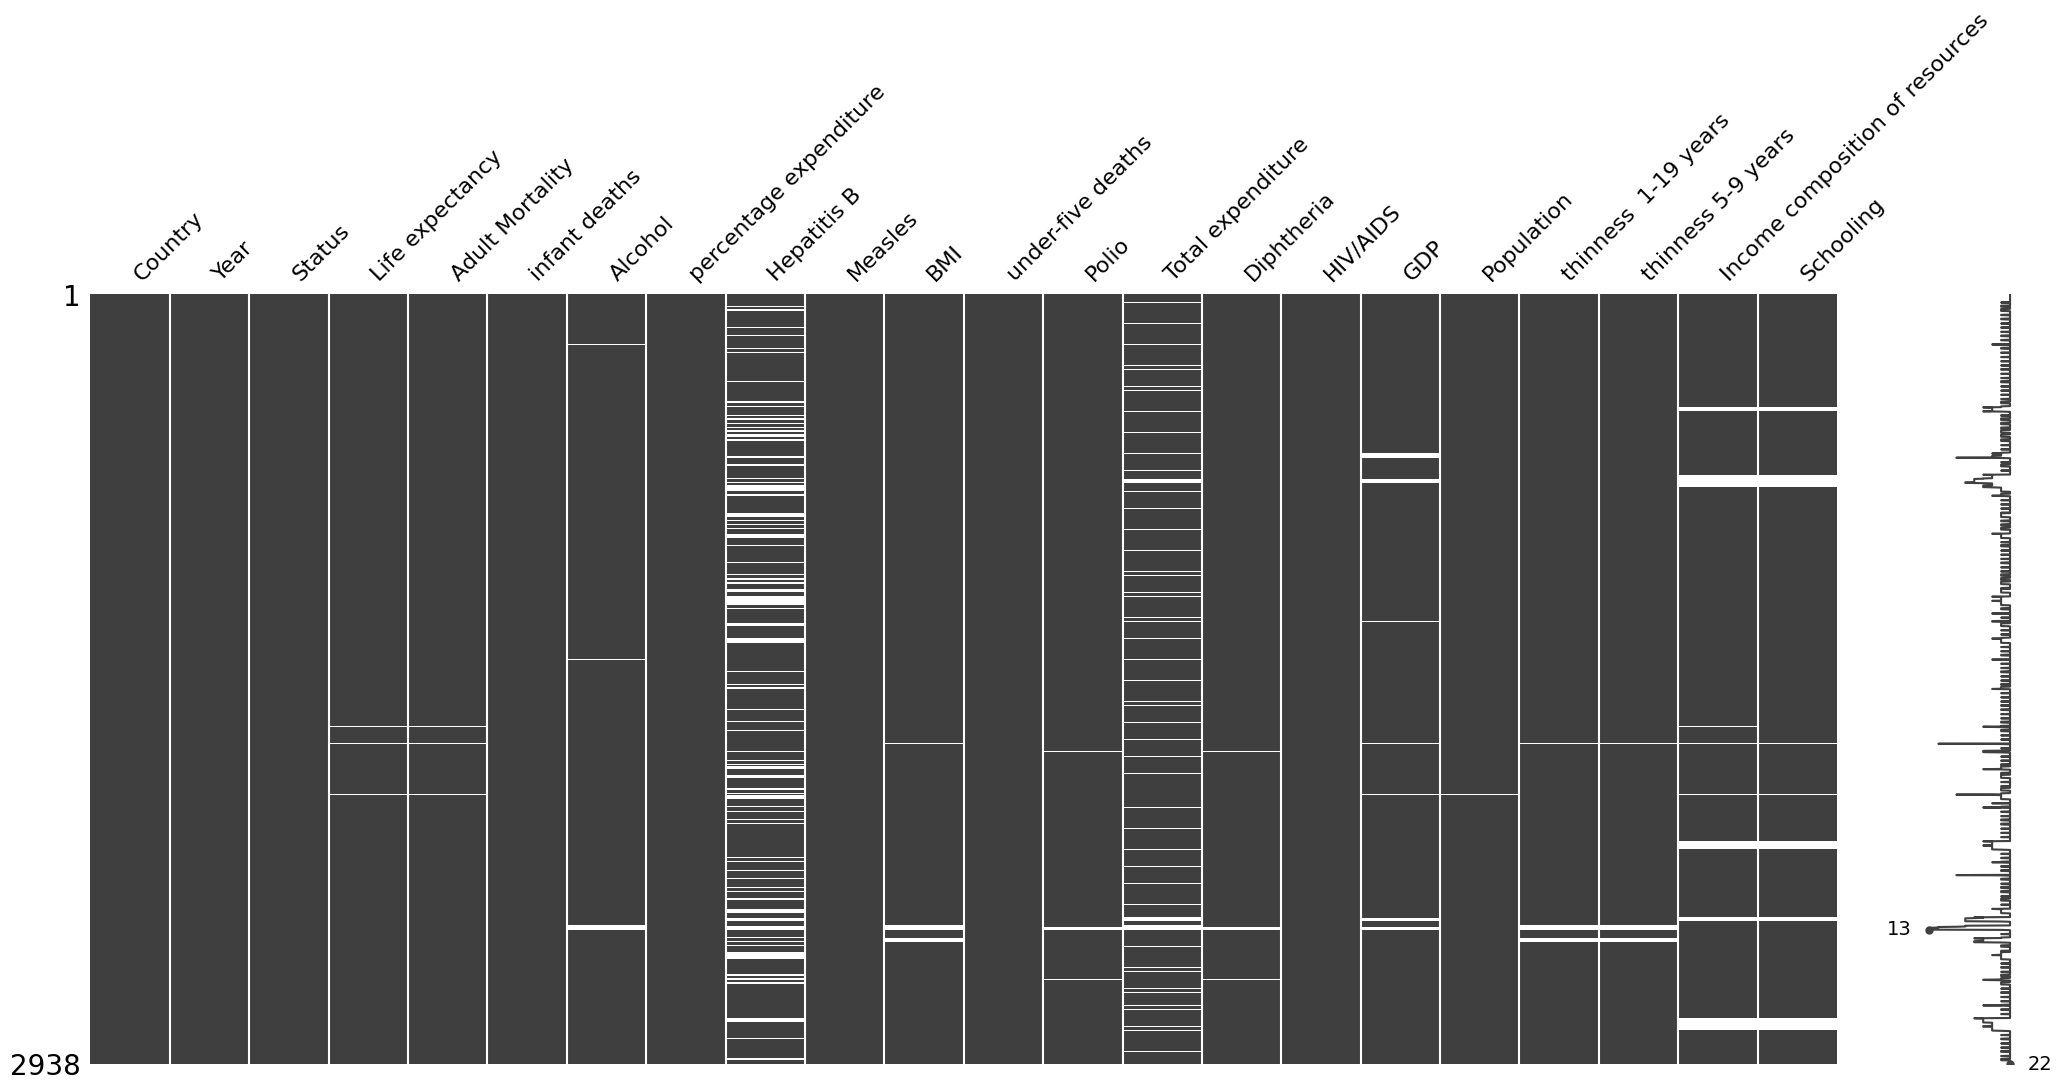

In [100]:
msno.matrix(data)
plt.show()

# Now the alcohol, Population and GDP data are fixed some Linear regression models can be made to predict Life expectancy. 
## The rest of the NaNs can be filled with the means

In [101]:
data['Life expectancy'] = data['Life expectancy'].bfill()

In [102]:
data[data['Life expectancy'].isnull()]

Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness  1-19 years, thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns]

## Now to create a Linear regression model

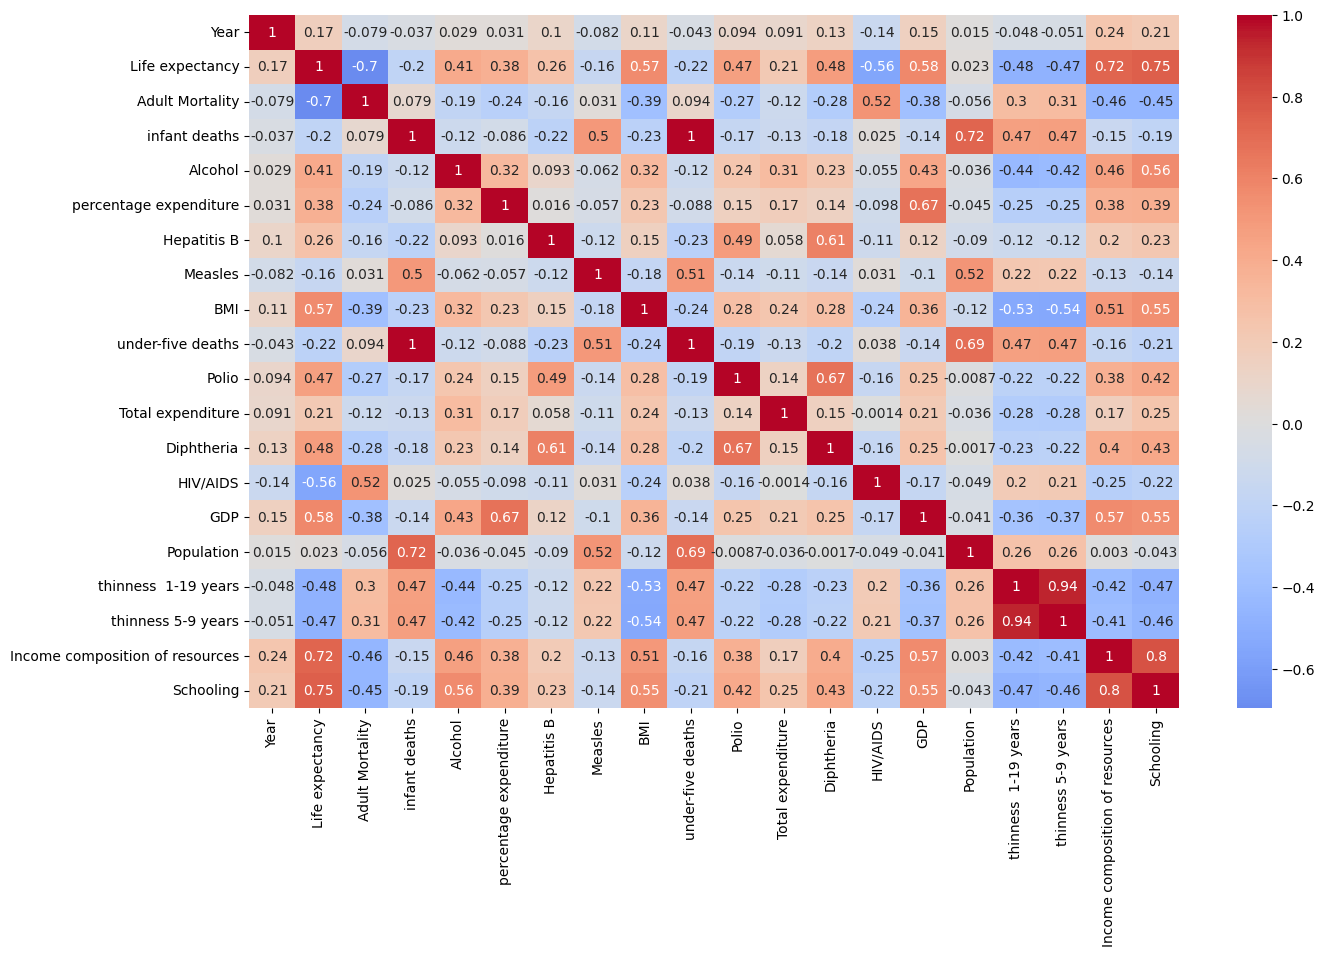

In [103]:

corr = data.drop(columns=['Country', 'Status']).corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()
# print(corr)

features = ['Status', 'Alcohol', 'Income composition of resources','Adult Mortality', 'BMI', 'GDP', 'HIV/AIDS', 'thinness  1-19 years', 'Polio', 'Measles', 'Schooling', 'under-five deaths']


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['Adult Mortality', 'GDP', 'Population', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI', 'under-five deaths', 'Schooling', 'HIV/AIDS', 'Polio']


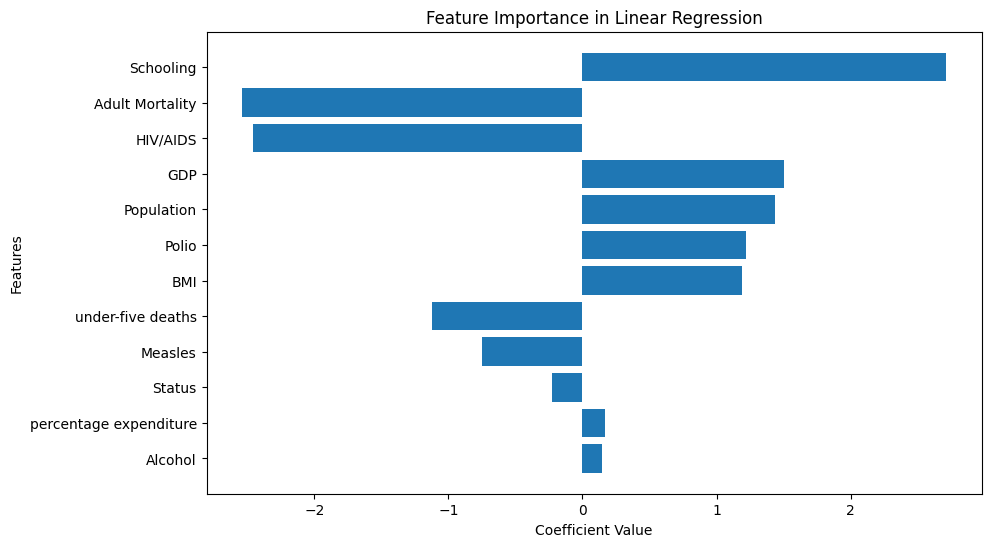

                   Feature  Importance
8                Schooling    0.165846
0          Adult Mortality    0.143686
9                 HIV/AIDS    0.135030
1                      GDP    0.053337
2               Population    0.043998
10                   Polio    0.033646
6                      BMI    0.033195
7        under-five deaths    0.028637
5                  Measles    0.012803
4   percentage expenditure    0.000853
3                  Alcohol    0.000736
11                  Status    0.000384
Root mean Squared Error: 4.211662437540924
R2 value: 0.8107506714378323



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


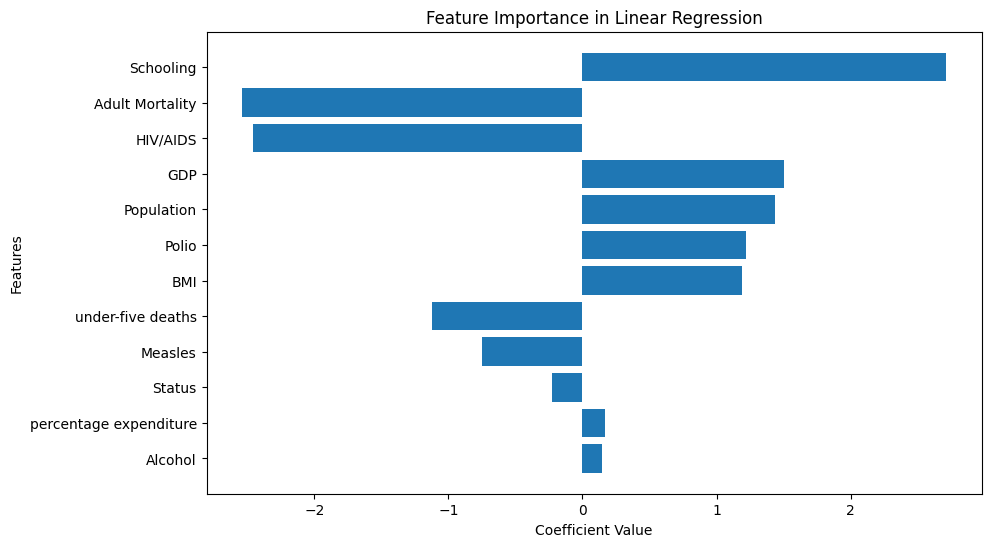

                   Feature    Importance
2               Population  2.328183e+10
5                  Measles  1.925675e+10
1                      GDP  3.666594e+09
7        under-five deaths  5.345447e+08
4   percentage expenditure  5.255720e+07
6                      BMI  1.196741e+07
10                   Polio  1.117787e+06
8                Schooling  8.448901e+05
3                  Alcohol  7.409529e+04
11                  Status  6.295075e+03
9                 HIV/AIDS -2.599626e+06
0          Adult Mortality -7.797076e+07
Root mean Squared Error: 239499701.23261297
R2 value: -611979942426962.4
['Alcohol', 'Income composition of resources', 'Adult Mortality', 'BMI', 'GDP', 'HIV/AIDS', 'thinness  1-19 years', 'Polio', 'Measles', 'Schooling', 'under-five deaths']



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


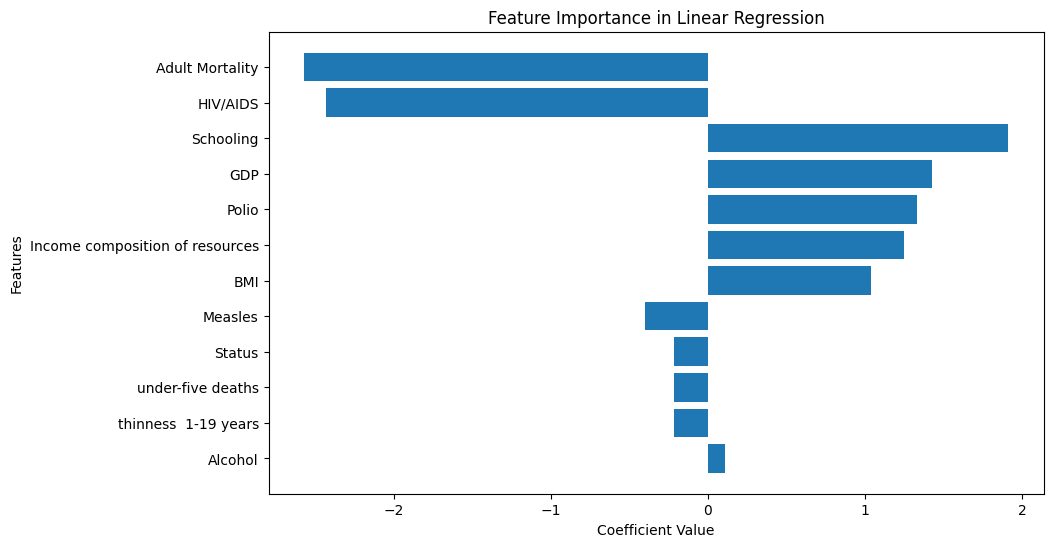

                            Feature  Importance
3                   Adult Mortality    0.146357
6                          HIV/AIDS    0.131974
10                        Schooling    0.082871
5                               GDP    0.047942
8                             Polio    0.040049
2   Income composition of resources    0.034588
4                               BMI    0.024962
9                           Measles    0.003787
7              thinness  1-19 years    0.001252
11                under-five deaths    0.001189
1                           Alcohol    0.000436
0                            Status    0.000372
Root mean Squared Error: 4.275699849746342
R2 value: 0.8049519299157205


In [104]:



parameters = [  'Adult Mortality', 'GDP', 'Population', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI', 'under-five deaths', 'Schooling', 'HIV/AIDS','Polio', 'Status']
scal_param = [ 'Adult Mortality', 'GDP', 'Population', 'Alcohol', 'percentage expenditure', 'Measles', 'BMI', 'under-five deaths', 'Schooling', 'HIV/AIDS','Polio']

def linear(data, parameters, scale=True):

    model = LinearRegression()


    X = data[parameters]
    y = data['Life expectancy']

    X.bfill(inplace=True)
    y.bfill(inplace=True)

    
    if scale:
        scaler = StandardScaler()
        scal_param = [param for param in parameters if param != 'Status']
        print(scal_param)
        X[scal_param] = scaler.fit_transform(X[scal_param])

    



    label_encoder = LabelEncoder()
    X.loc[:, 'Status'] = label_encoder.fit_transform(X['Status'].copy())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model.fit(X_train, y_train)

    
    

    ## Convert back to DataFrame after standardizing the full dataset
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

    # Train the model on standardized data
    model.fit(X_scaled, y)

    # # Get standardized coefficients
    # coefficients = model.coef_

    # # Display feature importance
    # features = [f'Feature {i}' for i in range(X.shape[1])]
    # importance_df = pd.DataFrame({'Feature': features, 'Importance': coefficients})
    # importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    # plt.figure(figsize=(12,7))
    # plt.bar(importance_df['Feature'], importance_df['Importance'])
    # plt.xlabel('Feature')
    # plt.ylabel('Coefficient Value')
    # plt.title('Feature Importance in Linear Regression')
    # plt.show()

    # from sklearn.inspection import permutation_importance

    # # Evaluate model on test set
    # results = permutation_importance(model, X, y, n_repeats=10, random_state=42)

    # # Display feature importance
    # importance_df = pd.DataFrame({'Feature': features, 'Importance': results.importances_mean})
    # importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    # plt.bar(importance_df['Feature'], importance_df['Importance'])
    # plt.xlabel('Feature')
    # plt.ylabel('Permutation Importance')
    # plt.title('Permutation Feature Importance')
    # plt.show()




    feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
    
    feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title('Feature Importance in Linear Regression')
    plt.gca().invert_yaxis()
    plt.show()

    

    results = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': results.importances_mean
    }).sort_values(by='Importance', ascending=False)

    print(feature_importance)




    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print("Root mean Squared Error:", np.sqrt(mse))

    r2 = r2_score(y_test,y_pred)
    print("R2 value:", r2)

linear(data, parameters)
linear(data, parameters, scale=False)
linear(data, features)


In [105]:

parameters = ['Alcohol', 'Income composition of resources','Adult Mortality', 'BMI', 'GDP', 'HIV/AIDS', 'thinness  1-19 years', 'Polio', 'Measles', 'Schooling', 'under-five deaths']

# Define features and target
X = data[parameters]
y = data['Life expectancy']

X.bfill(inplace=True)
y.bfill(inplace=True)



scaler = StandardScaler()
scal_param = [param for param in parameters if param != 'Status']
print(scal_param)
X[scal_param] = scaler.fit_transform(X[scal_param])


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional, but recommended for many datasets)


# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': -1,
    'num_leaves': 15,
    'seed': 42,
    'n_estimators' : 500
}

# Train the model
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    
)

# Evaluate the model
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Feature importance
feature_importances = model.feature_importance()
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Recursive Feature Elimination (RFE)
from sklearn.linear_model import LinearRegression

base_model = lgb.LGBMRegressor(**params)
rfe = RFE(estimator=base_model, n_features_to_select=5)  # Choose a number of features
rfe.fit(X_train, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print(f"Selected features: {list(selected_features)}")

# Re-train using selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

final_model = lgb.LGBMRegressor(**params)
final_model.fit(X_train_rfe, y_train)
y_pred_rfe = final_model.predict(X_test_rfe)

final_rmse = mean_squared_error(y_test, y_pred_rfe, squared=False)
print(f"Final RMSE with selected features: {final_rmse}")

final_r2 = r2_score(y_test, y_pred_rfe)
print(f"Final R^2 with selected features: {final_r2}")


['Alcohol', 'Income composition of resources', 'Adult Mortality', 'BMI', 'GDP', 'HIV/AIDS', 'thinness  1-19 years', 'Polio', 'Measles', 'Schooling', 'under-five deaths']
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 11
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 69.292128



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Found `n_estimators` in params. Will use it instead of argument


RMSE: 1.5973820222453028
                            Feature  Importance
2                   Adult Mortality        1133
0                           Alcohol         788
4                               GDP         661
3                               BMI         652
6              thinness  1-19 years         640
1   Income composition of resources         623
9                         Schooling         593
8                           Measles         558
10                under-five deaths         457
5                          HIV/AIDS         455
7                             Polio         440
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2146
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 11
[LightGBM] [Info] Start training from score 69.292128
[LightGBM] [Info] Auto-choosing col-wise multi-threading,

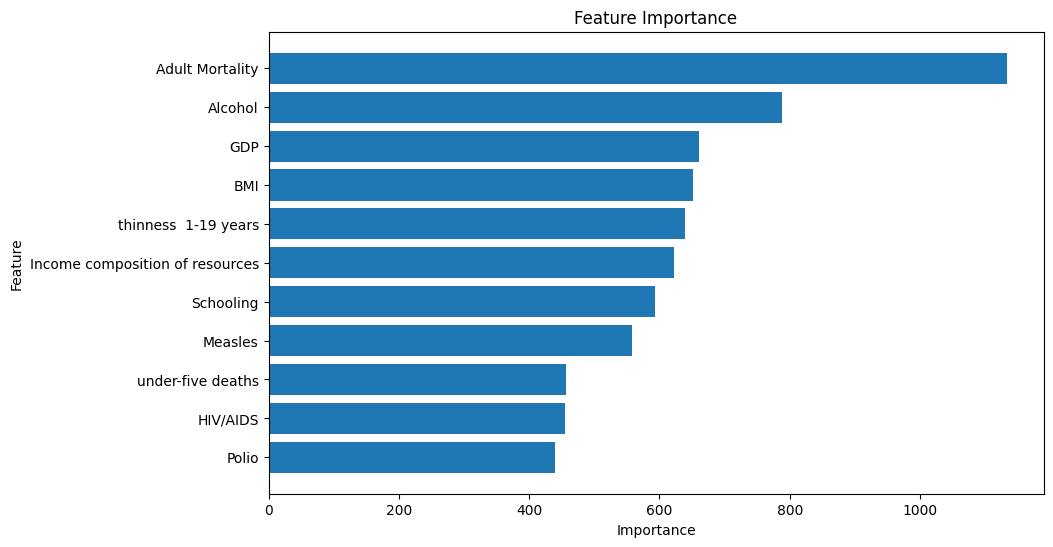

In [106]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()



In [107]:

param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 5, 10],
    'n_estimators': [100, 200, 500]
}
grid_search = GridSearchCV(
    estimator=lgb.LGBMRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2068
[LightGBM] [Info] Number of data points in the train set: 1566, number of used features: 11
[LightGBM] [Info] Start training from score 69.632248
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 1567, number of used features: 11
[LightGBM] [Info] Start training from score 69.025207
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

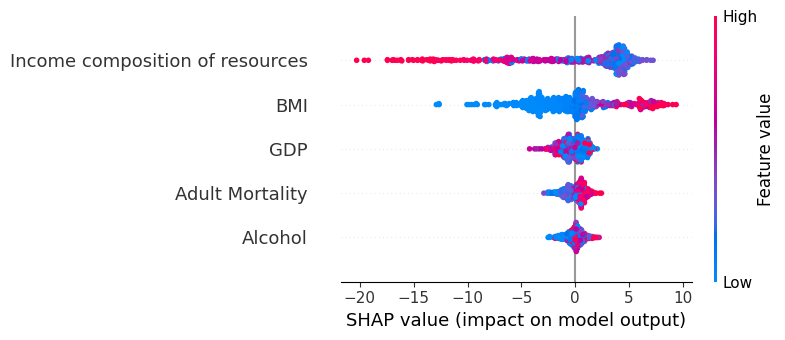

In [108]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_rfe)
shap.summary_plot(shap_values, X_test_rfe, feature_names=parameters)

In [109]:
scores = cross_val_score(final_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Cross-validated RMSE: {np.sqrt(-scores).mean():.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2138
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 11
[LightGBM] [Info] Start training from score 69.431106
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 11
[LightGBM] [Info] Start training from score 69.180170
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of te

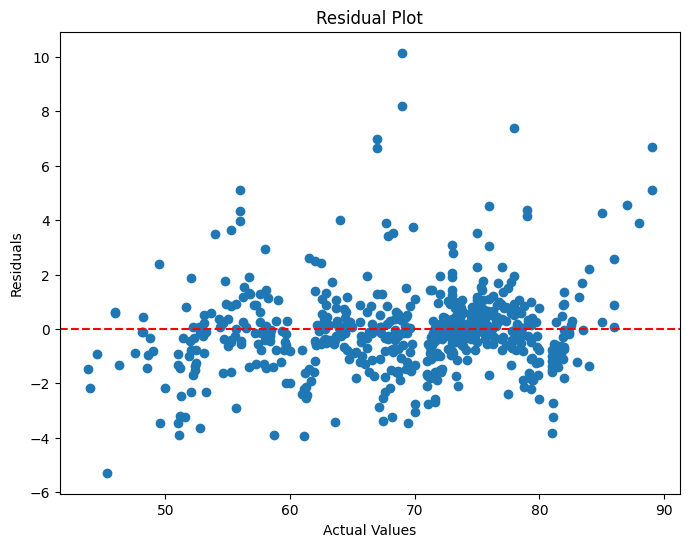

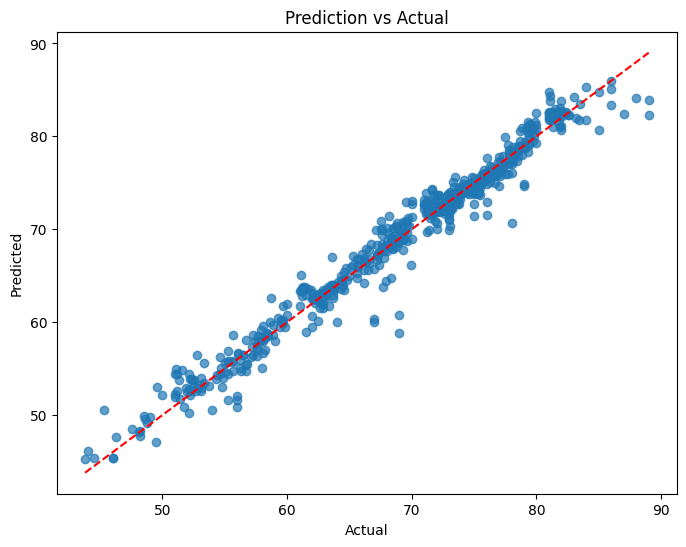

In [110]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction vs Actual')
plt.show()